## Sobre la correcta lectura de las series de tiempo generadas por el proceso fotométrico 

Este notebook tiene como objetivo demostrar la manipulación de los datos generados desde VVV. Para esto, utilizaremos el primer catálogo con la lista de estrellas que temenos en común con Carolina. Con un total de 122 estrellas en común entre la lista de objetos con espectro de APOGEE-2 y con series de tiempo en VVV. Sospecho que el número fuentes en total se ha reducido del total de estrellas con espectro alrededor de M22 (que son en total 198) dado que hay fuentes muy brillantes para la sensibilidad del detector del telescopio VISTA. 


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import subprocess
import pandas as pd

Primero, leemos el archivo como un dataframe:

In [6]:
APOGEE = pd.read_csv('Match_APOGEE_VVV.csv', index_col=False)  

APOGEE

,ID_caro,RA_caro,Dec_caro,col4,col5,col6,RA,Dec,ID,Nepochs,...,logChi2,dlogChi2,J,dJ,K,dK,SigmaMu,dSigmaMu,Separation,lc
0,2M18352222-2348017,278.842603,-23.800478,10.030393,-5.517631,-1.945661,278.842571,-23.800526,M22_38294,34,...,4.585505,0.263434,4.070598,0.878178,0.859113,0.027342,0.045570,0.006139,0.203233,[[5.52943814e+04 1.12970000e+01 6.30000000e-02...
1,2M18352706-2402370,278.862753,-24.043617,9.541762,-5.928536,-1.526262,278.862790,-24.043629,M22_7835,67,...,1.453104,0.154851,0.374352,0.169118,0.811737,0.027586,0.007951,0.000582,0.129329,[[5.54341757e+04 1.17510000e+01 4.10000000e-02...
2,2M18352797-2349485,278.866547,-23.830153,-2.569572,-6.556312,0.266518,278.866572,-23.830152,M22_35529,67,...,1.856420,0.163256,0.668985,0.250713,0.830169,0.030405,0.009546,0.000609,0.083775,[[5.52943814e+04 1.14270000e+01 4.40000000e-02...
3,2M18353841-2348125,278.910077,-23.803476,9.405756,-5.618292,-1.621361,278.910165,-23.803486,M22_42421,61,...,3.451125,0.141045,2.203050,0.586720,0.856552,0.031943,0.024420,0.001434,0.290534,[[5.52943814e+04 1.15330000e+01 5.40000000e-02...
4,2M18354109-2356392,278.921240,-23.944229,9.704184,-5.122194,-1.672862,278.921309,-23.944217,M22_22313,66,...,1.072272,0.176988,0.213512,0.152588,0.825498,0.024674,0.006767,0.000610,0.231803,[[5.52943814e+04 1.19950000e+01 4.20000000e-02...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2M18370740-2342071,279.280850,-23.701973,9.886014,-5.275884,-1.781761,279.280893,-23.701940,M22_74706,67,...,-0.453330,0.190433,-0.619465,0.076952,0.771519,0.024778,0.003220,0.000298,0.185450,[[5.52943814e+04 1.15260000e+01 4.10000000e-02...
118,2M18370824-2352000,279.284371,-23.866693,-0.918714,-3.173885,-0.064148,279.284389,-23.866634,M22_57471,65,...,2.922367,0.141348,1.399236,0.426059,0.838475,0.027623,0.019106,0.001860,0.219831,[[5.52943814e+04 1.11680000e+01 5.10000000e-02...
119,2M18370856-2357434,279.285682,-23.962078,9.686668,-5.528274,-1.593962,279.285729,-23.962047,M22_44094,63,...,-0.980141,0.160523,-0.763973,0.047011,0.853084,0.027879,0.002222,0.000187,0.188509,[[5.52943814e+04 1.20790000e+01 4.50000000e-02...
120,2M18371020-2345463,279.292512,-23.762871,-2.251274,-4.867423,-0.613562,279.292512,-23.762867,M22_69787,66,...,1.992819,0.149489,0.778571,0.238181,0.825384,0.028636,0.011277,0.000965,0.014793,[[5.52943814e+04 1.11350000e+01 4.40000000e-02...


Entonces, este catálogo ofrece la información que Carolina ha logrado obtener desde APOGEE a la izquierda (ID_caro, RA_caro, Dec_caro, col4 (pm Ra), col5 (pm dec), col6 ([Fe/H])), luego vienen los parámetros fotométricos que he podido medir y extraer desde la serie de tiempo de los objetos, y finalmente: la serie de tiempo (lc).

Entonces, la serie de tiempo ha sido agregada al final del catálogo para así ser extraída directamente del catálogo. Luego de trabajar en el formato del catálogo, tuve que construir una función para poder leer correctamente la serie de tiempo desde el catálogo, la cual es definida a continuación:

In [2]:
def Formato_SerieTiempo(timeserie):
    """
    Para extraer la informacion de la serie de tiempo dentro del dataframe. 
    """
    
    Valores = timeserie.split('\n')

    lc = np.zeros((epocas,3))
    contador = 0

    # Loop through each string and convert it to an array of floats
    for string in Valores:
        # Remove the square brackets and split the string by spaces
        values = string.strip('[]')

        #hay que quitar dos espacios al inicio de los arrays, exceptuando el primer caso:
        if contador != 0:
            values = values[2:]

        values = values.split()
        float_array = [float(value) for value in values]
        lc[contador] = float_array    
        contador = contador +1
        
    return lc

Entonces, si quisieramos leer parte de la información de una estrella en particular del dataframe, podríamos hacer lo siguiente:

In [55]:
#Estrella de interés:
estrella = 14

timeserie = APOGEE.iloc[estrella]['lc']
epocas = APOGEE.iloc[estrella]['Nepochs']
ID = APOGEE.iloc[estrella]['ID_caro']
RA = APOGEE.iloc[estrella]['RA']
Dec = APOGEE.iloc[estrella]['Dec']

print(RA, Dec, ID)

278.9900762 -23.7946738 2M18355760-2347409


Con esto, ya podemos dar el formato a la serie de tiempo usando la función antes definida. Así podemos aislar cada valor en columnas separadas, y definir la serie como es usual:

In [39]:
lc = Formato_SerieTiempo(timeserie)
mjd,mag,err = lc[:,0], lc[:,1], lc[:,2]

La siguiente celda muestra mi forma preferida de visualizar las series de tiempo:

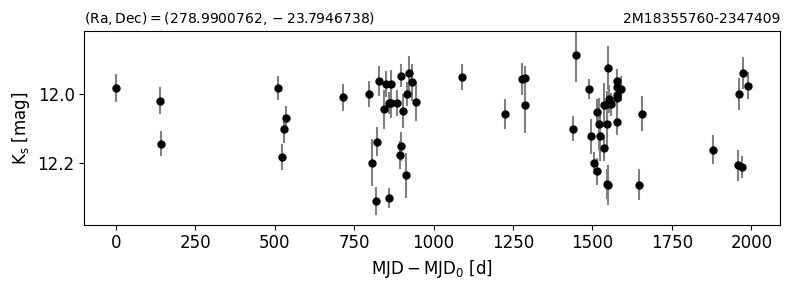

In [53]:
plt.figure(figsize=(8,3))

#Tamaño de la fuente
fz=10

plt.title( r'${\rm (Ra,Dec)=(%0.7f, %0.7f)}$'%(RA,Dec), loc='left',fontsize=fz)
plt.title(ID, loc='right',fontsize=fz)

plt.errorbar(mjd-min(mjd), mag, err, fmt='.k', ecolor='gray',ms=10)

plt.ylim(np.min(mag)-1.5*np.mean(err),np.max(mag)+1.5*np.mean(err))
plt.tick_params(axis="both", labelsize='large')

plt.xlabel(r'${\rm MJD - MJD_{0}}$ [d]',fontsize=fz+2)
plt.ylabel(r'${\rm K_{s} }$ [mag]',fontsize=fz+2)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

La estrella anterior no fue elegida al azar, resulta que es una RRlyrae con un periodo P=0.649534, identificada en la literatura como [Cl* NGC 6656 SAW V7](https://simbad.cds.unistra.fr/simbad/sim-id?Ident=%402521868&Name=Cl*%20NGC%206656%20%20%20%20SAW%20V7&submit=submit). Esta estrella además ha sido discutida recientemente en un paper de Javier Alonso (2021) sobre búsqueda de estrellas variables periodicas alrededor de cúmulos globulares, particularmente alrededor de M22. El paper puede ser consultado [aquí](https://www.aanda.org/articles/aa/pdf/2021/07/aa40546-21.pdf).

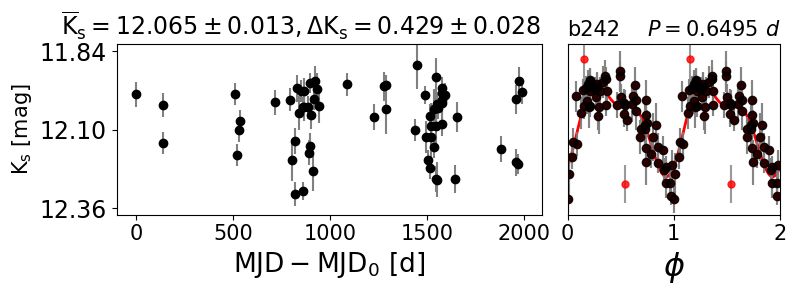

In [52]:
plot_lc_phase(mjd,mag,err, 0.649534, figsize=(8,3), tile='b242')

La función antes usada (plot_lc_phase) 